In [1]:
import sys
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.colors as mcolors
import numpy as np

import json

from plot import display_training

colors = pl.colormaps['Dark2']

pl.rcParams.update({'font.size': 12})
pl.rc('axes', labelsize=14)
pl.rcParams.update({
    "text.usetex": False,
})

[ 2048  4096  8192 12288 16384 20480 24576 32768]
GD Accuracy:  [0.71767578 0.72324219 0.71826172 0.72302246 0.72207031 0.72421875
 0.71904297 0.7265625 ]
Trained TF Accuracy:  [0.52402344 0.60917969 0.66972656 0.68676758 0.70039063 0.70371094
 0.71171875 0.71972656]
GD Loss:  [0.97105328 0.94517946 0.94445739 0.93937254 0.93605667 0.93312767
 0.93005198 0.93422139]
Trained TF Loss:  [1.74254122 1.4336097  1.16501532 1.07915485 1.02058361 1.0014626
 0.97227764 0.96784431]
getting legend
displaying


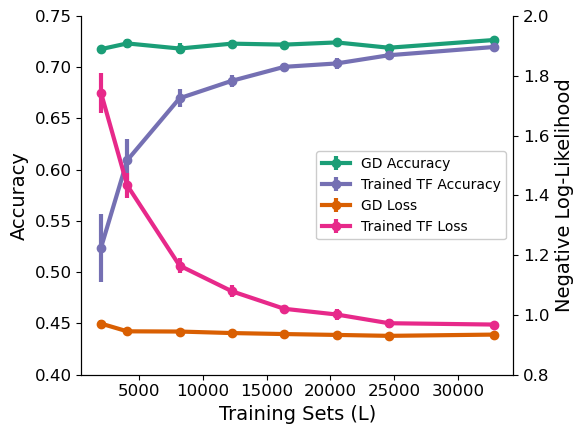

In [2]:
kernels = ['softmax']
labels = ["Softmax"]
data_sizes = [2048, 4096, 8192, 12288, 16384, 20480, 24576, 32768]

steps = 5000 // 100

data_path = "../results/reg_emb_cats_25_d_10/layers_2"
save_path = "../results/reg_emb_cats_25_d_10/layers_2"

es = True

for j, model_kernel in enumerate(kernels):
    loss_trans_mean = []
    loss_trans_std = []
    acc_trans_mean = []
    acc_trans_std = []

    loss_gd_mean = []
    loss_gd_std = []
    acc_gd_mean = []
    acc_gd_std = []
    
    for data_size in data_sizes:
        data_f = open(data_path + '/l_{}/{}/results.json'.format(data_size, model_kernel))
        data = json.load(data_f)

        loss_trans_list = list(filter(None, data['loss_trans_list']))
        acc_trans_list = list(filter(None, data['acc_trans_list']))

        if es:
            best_idx_trans_list = data['best_idx_trans_list']
            for i, idx in enumerate(best_idx_trans_list):
                idx = idx // 100

                loss_trans_list[i][idx + 1:] = [loss_trans_list[i][idx]] * (steps - idx - 1)
                acc_trans_list[i][idx + 1:] = [acc_trans_list[i][idx]] * (steps - idx - 1)
        
        loss_trans_list = np.array(loss_trans_list)
        acc_trans_list = np.array(acc_trans_list)

        loss_trans_mean.append(np.mean(loss_trans_list, axis=0)[-1])
        loss_trans_std.append(np.std(loss_trans_list, axis=0)[-1])

        acc_trans_mean.append(np.mean(acc_trans_list, axis=0)[-1])
        acc_trans_std.append(np.std(acc_trans_list, axis=0)[-1])

        loss_gd_list = list(filter(None, data['losses_gd_list']))
        acc_gd_list = list(filter(None, data['acc_gd_list']))

        if es:
            best_idx_gd_list = data['gd_val_best_step']
            for i, idx in enumerate(best_idx_gd_list):
                idx = idx // 100

                loss_gd_list[i][idx + 1:] = [loss_gd_list[i][idx]] * (steps - idx - 1)
                acc_gd_list[i][idx + 1:] = [acc_gd_list[i][idx]] * (steps - idx - 1)
        
        loss_gd_list = np.array(loss_gd_list)
        acc_gd_list = np.array(acc_gd_list)

        loss_gd_mean.append(np.mean(loss_gd_list, axis=0)[-1])
        loss_gd_std.append(np.std(loss_gd_list, axis=0)[-1])

        acc_gd_mean.append(np.mean(acc_gd_list, axis=0)[-1])
        acc_gd_std.append(np.std(acc_gd_list, axis=0)[-1])
    
    loss_trans_mean = np.array(loss_trans_mean)
    loss_trans_std = np.array(loss_trans_std)
    acc_trans_mean = np.array(acc_trans_mean)
    acc_trans_std = np.array(acc_trans_std)

    loss_gd_mean = np.array(loss_gd_mean)
    loss_gd_std = np.array(loss_gd_std)
    acc_gd_mean = np.array(acc_gd_mean)
    acc_gd_std = np.array(acc_gd_std)

    # create figure and axes
    fig, ax1 = pl.subplots()
    ax1.set_xlabel("Training Sets (L)")
    fig.set_size_inches(6, 4.5)

    # Epochs
    # x_range = np.arange(0, 5000, int(5000 / len(loss_trans_mean)))
    x_range = np.array(data_sizes)

    print(x_range)

    color_add = 0

    # GD Accuracy
    # ax1.fill_between(x_range, acc_gd_mean - acc_gd_std, acc_gd_mean + acc_gd_std, alpha=0.2,
    #                          facecolor=colors(0.1 + color_add))
    # ln1 = ax1.plot(x_range, acc_gd_mean, color=colors(0.1 + color_add), label='GD Accuracy', linewidth='3')
    print("GD Accuracy: ", acc_gd_mean)
    ln1 = ax1.errorbar(x_range, acc_gd_mean, yerr=acc_gd_std, fmt='o', color=colors(0.1 + color_add), label='GD Accuracy', linestyle='-', linewidth=3)

    # Trained TF Accuracy
    # ax1.fill_between(x_range, acc_trans_mean - acc_trans_std, acc_trans_mean + acc_trans_std, alpha=0.2,
    #                          facecolor=colors(0.3 + color_add))
    # ln2 = ax1.plot(x_range, acc_trans_mean, color=colors(0.3 + color_add), label='Trained TF Accuracy', linewidth='3')
    print("Trained TF Accuracy: ", acc_trans_mean)
    ln2 = ax1.errorbar(x_range, acc_trans_mean, yerr=acc_trans_std, fmt='o', color=colors(0.3 + color_add), linestyle='-', label='Trained TF Accuracy', linewidth=3)

    ax1.set_ylabel("Accuracy")
    ax1.set_ylim(0.4, 0.75)

    ax1.spines['top'].set_visible(False)

    ax2 = ax1.twinx()

    # GD Accuracy
    # ax2.fill_between(x_range, loss_gd_mean - loss_gd_std, loss_gd_mean + loss_gd_std, alpha=0.2,
    #                          facecolor=colors(0.2 + color_add))
    # ln3 = ax2.plot(x_range, loss_gd_mean, color=colors(0.2 + color_add), label='GD Loss', linewidth='3')
    print("GD Loss: ", loss_gd_mean)
    ln3 = ax2.errorbar(x_range, loss_gd_mean, yerr=loss_gd_std, fmt='o', color=colors(0.2 + color_add), linestyle='-', label='GD Loss', linewidth=3)

    # Trained TF Accuracy
    # ax2.fill_between(x_range, loss_trans_mean - loss_trans_std, loss_trans_mean + loss_trans_std, alpha=0.4,
    #                          facecolor=colors(0.4 + color_add))
    # ln4 = ax2.plot(x_range, loss_trans_mean, color=colors(0.4 + color_add), label='Trained TF Loss', linewidth='3')
    print("Trained TF Loss: ", loss_trans_mean)
    ln4 = ax2.errorbar(x_range, loss_trans_mean, yerr=loss_trans_std, fmt='o', color=colors(0.4 + color_add), linestyle='-', label='Trained TF Loss', linewidth=3)

    ax2.set_ylabel("Negative Log-Likelihood", color='k')
    ax2.set_ylim(0.8, 2)

    ax2.spines['top'].set_visible(False)

    print("getting legend")

    lns = [ln1, ln2, ln3, ln4]
    labels = [l.get_label() for l in lns]
    legend1 = ax1.legend(lns, labels, loc='center right', framealpha=1, facecolor='white', fontsize=10)
    legend1.set_zorder(100)
    print("displaying")

    plt.tight_layout()

    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    
    if es:
        plt.savefig(save_path + "/{}_acc_loss_es.png".format(model_kernel), format="png", bbox_inches="tight", pad_inches=0)
    else:
        plt.savefig(save_path + "/{}_acc_loss.png".format(model_kernel), format="png", bbox_inches="tight", pad_inches=0)

    # plt.close()

[1 2 3 4 5 6]
GD Accuracy:  [0.70205078 0.71767578 0.72890625 0.73066406 0.72832031 0.72705078]
GD Loss std:  [0.00437169 0.00233968 0.00300045 0.00266729 0.00330592 0.00281345]
Trained TF Accuracy:  [0.57519531 0.52402344 0.47412109 0.47949219 0.48125    0.48300781]
GD Loss:  [1.05809441 0.97105328 0.9428834  0.92383965 0.91578896 0.92096752]
GD Loss std:  [0.00914298 0.01154671 0.01036318 0.00863575 0.01275766 0.00784991]
Trained TF Loss:  [1.52004745 1.74254122 1.84748104 1.84699843 1.84527023 1.8382345 ]
getting legend
displaying


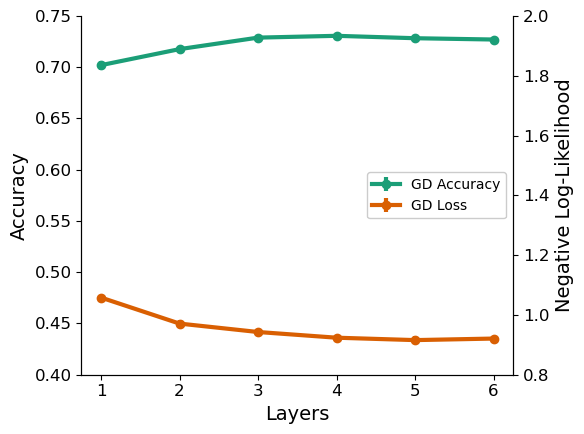

In [16]:
kernels = ['softmax']
labels = ["Softmax"]
data_sizes = [2048]
layers = [1, 2, 3, 4, 5, 6]

steps = 5000 // 100

data_path = "../results/reg_emb_cats_25_d_10/layers"
save_path = "../results/reg_emb_cats_25_d_10"

es = True

for j, model_kernel in enumerate(kernels):
    loss_trans_mean = []
    loss_trans_std = []
    acc_trans_mean = []
    acc_trans_std = []

    loss_gd_mean = []
    loss_gd_std = []
    acc_gd_mean = []
    acc_gd_std = []
    
    for layer in layers:
        if layer == 2:
            data_f = open(data_path + '_{}/l_2048/{}/results.json'.format(layer, model_kernel))
        else:
            data_f = open(data_path + '_{}/c_size_125_v5/{}/results.json'.format(layer, model_kernel))
        data = json.load(data_f)

        loss_trans_list = list(filter(None, data['loss_trans_list']))
        acc_trans_list = list(filter(None, data['acc_trans_list']))

        if es:
            best_idx_trans_list = data['best_idx_trans_list']
            for i, idx in enumerate(best_idx_trans_list):
                idx = idx // 100

                loss_trans_list[i][idx + 1:] = [loss_trans_list[i][idx]] * (steps - idx - 1)
                acc_trans_list[i][idx + 1:] = [acc_trans_list[i][idx]] * (steps - idx - 1)
        
        loss_trans_list = np.array(loss_trans_list)
        acc_trans_list = np.array(acc_trans_list)

        loss_trans_mean.append(np.mean(loss_trans_list, axis=0)[-1])
        loss_trans_std.append(np.std(loss_trans_list, axis=0)[-1])

        acc_trans_mean.append(np.mean(acc_trans_list, axis=0)[-1])
        acc_trans_std.append(np.std(acc_trans_list, axis=0)[-1])

        loss_gd_list = list(filter(None, data['losses_gd_list']))
        acc_gd_list = list(filter(None, data['acc_gd_list']))

        if es:
            best_idx_gd_list = data['gd_val_best_step']
            for i, idx in enumerate(best_idx_gd_list):
                idx = idx // 100

                loss_gd_list[i][idx + 1:] = [loss_gd_list[i][idx]] * (steps - idx - 1)
                acc_gd_list[i][idx + 1:] = [acc_gd_list[i][idx]] * (steps - idx - 1)
        
        loss_gd_list = np.array(loss_gd_list)
        acc_gd_list = np.array(acc_gd_list)

        loss_gd_mean.append(np.mean(loss_gd_list, axis=0)[-1])
        loss_gd_std.append(np.std(loss_gd_list, axis=0)[-1])

        acc_gd_mean.append(np.mean(acc_gd_list, axis=0)[-1])
        acc_gd_std.append(np.std(acc_gd_list, axis=0)[-1])
    
    loss_trans_mean = np.array(loss_trans_mean)
    loss_trans_std = np.array(loss_trans_std)
    acc_trans_mean = np.array(acc_trans_mean)
    acc_trans_std = np.array(acc_trans_std)

    loss_gd_mean = np.array(loss_gd_mean)
    loss_gd_std = np.array(loss_gd_std)
    acc_gd_mean = np.array(acc_gd_mean)
    acc_gd_std = np.array(acc_gd_std)

    # create figure and axes
    fig, ax1 = pl.subplots()
    ax1.set_xlabel("Layers")
    fig.set_size_inches(6, 4.5)

    # Epochs
    # x_range = np.arange(0, 5000, int(5000 / len(loss_trans_mean)))
    x_range = np.array(layers)

    print(x_range)

    color_add = 0

    # GD Accuracy
    # ax1.fill_between(x_range, acc_gd_mean - acc_gd_std, acc_gd_mean + acc_gd_std, alpha=0.2,
    #                          facecolor=colors(0.1 + color_add))
    # ln1 = ax1.plot(x_range, acc_gd_mean, color=colors(0.1 + color_add), label='GD Accuracy', linewidth='3')
    print("GD Accuracy: ", acc_gd_mean)
    print("GD Loss std: ", acc_gd_std)
    ln1 = ax1.errorbar(x_range, acc_gd_mean, yerr=acc_gd_std, fmt='o', color=colors(0.1 + color_add), label='GD Accuracy', linestyle='-', linewidth=3)

    # Trained TF Accuracy
    # ax1.fill_between(x_range, acc_trans_mean - acc_trans_std, acc_trans_mean + acc_trans_std, alpha=0.2,
    #                          facecolor=colors(0.3 + color_add))
    # ln2 = ax1.plot(x_range, acc_trans_mean, color=colors(0.3 + color_add), label='Trained TF Accuracy', linewidth='3')
    print("Trained TF Accuracy: ", acc_trans_mean)
    # ln2 = ax1.errorbar(x_range, acc_trans_mean, yerr=acc_trans_std, fmt='o', color=colors(0.3 + color_add), linestyle='-', label='Trained TF Accuracy', linewidth=3)

    ax1.set_ylabel("Accuracy")
    ax1.set_ylim(0.4, 0.75)

    ax1.spines['top'].set_visible(False)

    ax2 = ax1.twinx()

    # GD Loss
    # ax2.fill_between(x_range, loss_gd_mean - loss_gd_std, loss_gd_mean + loss_gd_std, alpha=0.2,
    #                          facecolor=colors(0.2 + color_add))
    # ln3 = ax2.plot(x_range, loss_gd_mean, color=colors(0.2 + color_add), label='GD Loss', linewidth='3')
    print("GD Loss: ", loss_gd_mean)
    print("GD Loss std: ", loss_gd_std)
    ln3 = ax2.errorbar(x_range, loss_gd_mean, yerr=loss_gd_std, fmt='o', color=colors(0.2 + color_add), linestyle='-', label='GD Loss', linewidth=3)

    # Trained TF Loss
    # ax2.fill_between(x_range, loss_trans_mean - loss_trans_std, loss_trans_mean + loss_trans_std, alpha=0.4,
    #                          facecolor=colors(0.4 + color_add))
    # ln4 = ax2.plot(x_range, loss_trans_mean, color=colors(0.4 + color_add), label='Trained TF Loss', linewidth='3')
    print("Trained TF Loss: ", loss_trans_mean)
    # ln4 = ax2.errorbar(x_range, loss_trans_mean, yerr=loss_trans_std, fmt='o', color=colors(0.4 + color_add), linestyle='-', label='Trained TF Loss', linewidth=3)

    ax2.set_ylabel("Negative Log-Likelihood", color='k')
    ax2.set_ylim(0.8, 2)

    ax2.spines['top'].set_visible(False)

    print("getting legend")

    lns = [ln1, ln3]
    labels = [l.get_label() for l in lns]
    legend1 = ax1.legend(lns, labels, loc='center right', framealpha=1, facecolor='white', fontsize=10)
    legend1.set_zorder(100)
    print("displaying")

    plt.tight_layout()

    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    
    if es:
        plt.savefig(save_path + "/{}_gd_layers_es.png".format(model_kernel), format="png", bbox_inches="tight", pad_inches=0)
    else:
        plt.savefig(save_path + "/{}_gd_layers.png".format(model_kernel), format="png", bbox_inches="tight", pad_inches=0)

    # plt.close()

getting legend
displaying


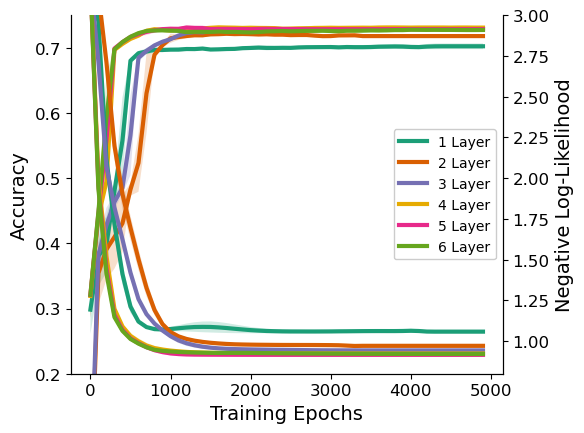

In [14]:
kernels = ['softmax']
labels = ["Softmax"]
data_sizes = [2048]
layers = [1, 2, 3, 4, 5, 6]

steps = 5000 // 100

data_path = "../results/reg_emb_cats_25_d_10/layers"
save_path = "../results/reg_emb_cats_25_d_10"

es = True

color_vals = [0.05, 0.15, 0.25, 0.65, 0.45, 0.55]

lns = []

for j, model_kernel in enumerate(kernels):
    color_add = 0

    # create figure and axes
    fig, ax1 = pl.subplots()
    ax1.set_xlabel("Training Epochs")
    fig.set_size_inches(6, 4.5)

    ax1.set_ylabel("Accuracy")
    ax1.set_ylim(0.2, 0.75)

    ax1.spines['top'].set_visible(False)

    ax2 = ax1.twinx()

    ax2.set_ylabel("Negative Log-Likelihood", color='k')
    ax2.set_ylim(0.8, 3)

    ax2.spines['top'].set_visible(False)
    
    for layer in layers:
        if layer == 2:
            data_f = open(data_path + '_{}/l_2048/{}/results.json'.format(layer, model_kernel))
        else:
            data_f = open(data_path + '_{}/c_size_125_v5/{}/results.json'.format(layer, model_kernel))
        data = json.load(data_f)

        loss_trans_list = list(filter(None, data['loss_trans_list']))
        acc_trans_list = list(filter(None, data['acc_trans_list']))

        if es:
            best_idx_trans_list = data['best_idx_trans_list']
            for i, idx in enumerate(best_idx_trans_list):
                idx = idx // 100

                loss_trans_list[i][idx + 1:] = [loss_trans_list[i][idx]] * (steps - idx - 1)
                acc_trans_list[i][idx + 1:] = [acc_trans_list[i][idx]] * (steps - idx - 1)
        
        loss_trans_list = np.array(loss_trans_list)
        acc_trans_list = np.array(acc_trans_list)

        loss_trans_mean.append(np.mean(loss_trans_list, axis=0)[-1])
        loss_trans_std.append(np.std(loss_trans_list, axis=0)[-1])

        acc_trans_mean.append(np.mean(acc_trans_list, axis=0)[-1])
        acc_trans_std.append(np.std(acc_trans_list, axis=0)[-1])

        loss_gd_list = list(filter(None, data['gd_train_loss_list']))
        acc_gd_list = list(filter(None, data['gd_train_acc_list']))

        if es:
            best_idx_gd_list = data['gd_val_best_step']
            for i, idx in enumerate(best_idx_gd_list):
                idx = idx // 100

                loss_gd_list[i][idx + 1:] = [loss_gd_list[i][idx]] * (steps - idx - 1)
                acc_gd_list[i][idx + 1:] = [acc_gd_list[i][idx]] * (steps - idx - 1)
        
        loss_gd_list = np.array(loss_gd_list)
        acc_gd_list = np.array(acc_gd_list)

        # trans_list_mean = np.mean(trans_list, axis=0)
        acc_gd_mean = np.mean(acc_gd_list, axis=0)
        loss_gd_mean = np.mean(loss_gd_list, axis=0)

        # trans_list_std = np.std(trans_list, axis=0)
        acc_gd_std = np.std(acc_gd_list, axis=0)
        loss_gd_std = np.std(loss_gd_list, axis=0)

        # Epochs
        # x_range_1 = np.arange(0, 5000, int(5000 / len(trans_list_mean)))
        x_range = np.arange(0, 5000, int(5000 / len(acc_gd_mean)))

        # ax1.plot(x_range_1, trans_list_mean, color=colors(color_vals[layer-1] + color_add),
        #          label="{} Layer".format(layer),
        #          linewidth='3')
        # ax1.fill_between(x_range_1, trans_list_mean - trans_list_std, trans_list_mean + trans_list_std,
        #                  alpha=0.2, facecolor=colors(color_vals[layer-1] + color_add))

        ln = ax1.plot(x_range, acc_gd_mean, color=colors(color_vals[layer-1] + color_add), label="{} Layer".format(layer),
                 linewidth='3')
        ax1.fill_between(x_range, acc_gd_mean - acc_gd_std, acc_gd_mean + acc_gd_std,
                         alpha=0.2, facecolor=colors(color_vals[layer-1] + color_add))
        
        lns.append(ln)

        ax2.plot(x_range, loss_gd_mean, color=colors(color_vals[layer-1] + color_add), label="{} Layer".format(layer),
                 linewidth='3')
        ax2.fill_between(x_range, loss_gd_mean - loss_gd_std, loss_gd_mean + loss_gd_std,
                         alpha=0.2, facecolor=colors(color_vals[layer-1] + color_add))


    print("getting legend")

    # lns = [ln1, ln2, ln3, ln4]
    # labels = [l.get_label() for l in lns]
    legend1 = ax1.legend(loc='center right', framealpha=1, facecolor='white', fontsize=10)
    legend1.set_zorder(100)
    print("displaying")

    plt.tight_layout()

    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    
    if es:
        plt.savefig(save_path + "/{}_gd_training_layers_es.png".format(model_kernel), format="png", bbox_inches="tight", pad_inches=0)
    else:
        plt.savefig(save_path + "/{}_gd_training_layers.png".format(model_kernel), format="png", bbox_inches="tight", pad_inches=0)